## Assignment

Import necessary library

In [210]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

print('Matplotlib version: ', mpl.__version__)
mpl.style.use(['ggplot'])

Matplotlib version:  3.4.2


Read the data

In [211]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

Drop unnecessary columns

In [212]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Rename columns title

In [213]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([    'Country',   'Continent',      'Region',     'DevName',
                1980,          1981,          1982,          1983,
                1984,          1985,          1986,          1987,
                1988,          1989,          1990,          1991,
                1992,          1993,          1994,          1995,
                1996,          1997,          1998,          1999,
                2000,          2001,          2002,          2003,
                2004,          2005,          2006,          2007,
                2008,          2009,          2010,          2011,
                2012,          2013, 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50'],
      dtype='object')

Add a 'Total' column

In [214]:
df_can['Total'] = df_can.sum(axis=1)
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58639.0
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15699.0
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69439.0
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0


**Question 1:** Let's compare the number of immigrants from India and China from 1980 to 2013.


Step 1: Get the data set for China and India, and display dataframe.

In [215]:
# Set Acuan Kolom Untuk Tahun
years = df_can.columns[4:38]

df_china_india = df_can.loc[
    (df_can['Country'] == 'China') |
    (df_can['Country'] == 'India')
]

df_china_india = df_china_india.iloc[:, np.r_[0, 4:38]]
df_china_india = df_china_india[years].transpose()

df_china_india.rename(columns={36: 'China', 79: 'India'}, inplace=True)
df_china_india.head()


,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


Step 2: Plot graph. We will explicitly specify line plot by passing in `kind` parameter to `plot()`.

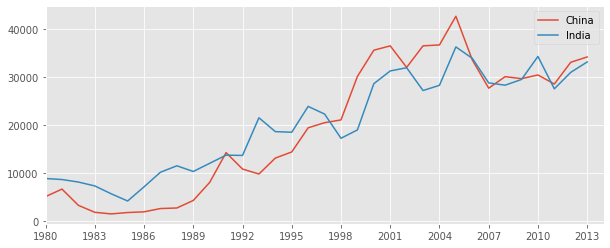

In [216]:
ax = df_china_india.plot(kind='line', figsize=(10, 4))
ax.set_xlim([1980, 2014])
ax.set_xticks(np.arange(1980, 2014, 3))

plt.show()

**Question 2:** Compare the trend of top 5 countries that contributed the most to immigration to Canada.

Step 1: Get the data set for top 5 countries

In [217]:
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_can.set_index('Country', inplace=True)

df_top = df_can.head(5)
df_top = df_top[years].transpose()
df_top.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Step 2: Plot graph

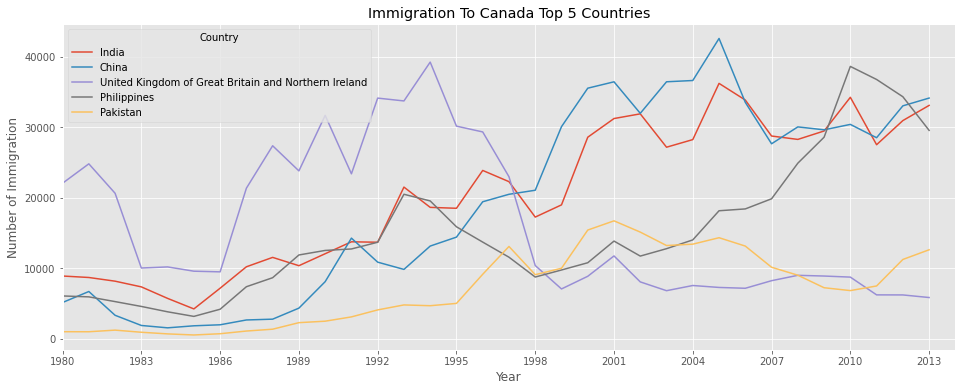

In [218]:
df_top.index = df_top.index.map(int)

ax = df_top.plot(kind='line', figsize=(16, 6))
ax.set_xlim([1980, 2014])
ax.set_xticks(np.arange(1980, 2014, 3))

plt.title('Immigration To Canada Top 5 Countries')
plt.ylabel('Number of Immigration')
plt.xlabel('Year')
plt.show()

**Question 3**: Create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada **from** 1980 to 2013. Use a transparency value of 0.55.

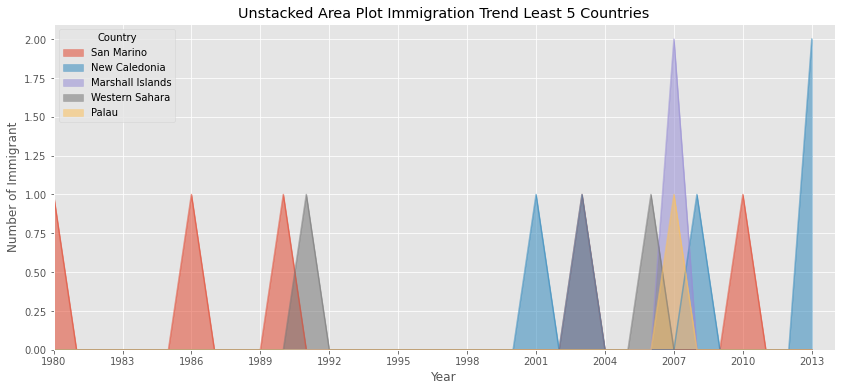

In [219]:
df_top = df_can.tail(5)
df_top = df_top[years].transpose()

ax = df_top.plot(kind='area', alpha=0.55, stacked=False, figsize=(14, 6))
ax.set_xlim([1980, 2014])
ax.set_xticks(np.arange(1980, 2014, 3))

plt.title('Unstacked Area Plot Immigration Trend Least 5 Countries')
plt.ylabel('Number of Immigrant')
plt.xlabel('Year')

plt.show()


**Question 4**: Display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

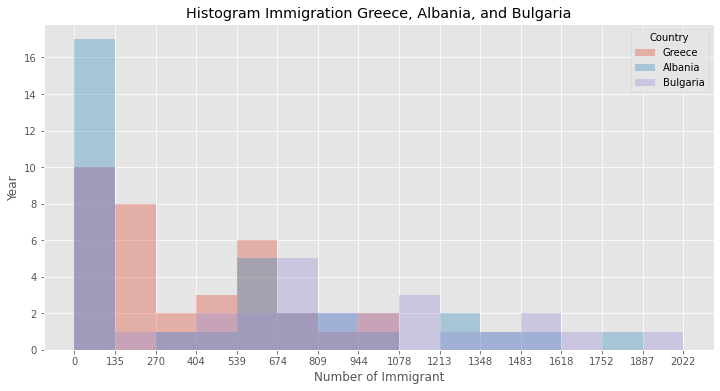

In [220]:
df_dist = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years]
df_dist = df_dist.transpose()

count, bin_edges = np.histogram(df_dist, 15)
df_dist.plot(kind='hist', figsize=(12, 6), bins=15, alpha=0.35, xticks=bin_edges)

plt.title('Histogram Immigration Greece, Albania, and Bulgaria')
plt.ylabel('Year')
plt.xlabel('Number of Immigrant')
plt.show()


**Question 5:** Create a *horizontal* bar plot showing the *total* number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

Step 1: Get the data pertaining to the top 15 countries.

In [221]:
df_can.sort_values(by='Total', ascending=True, inplace=True)

df_top_15 = df_can['Total'].tail(15)
df_top_15

Country
Romania                                                  93585.0
Viet Nam                                                 97146.0
Jamaica                                                 106431.0
France                                                  109091.0
Lebanon                                                 115359.0
Poland                                                  139241.0
Republic of Korea                                       142581.0
Sri Lanka                                               148358.0
Iran (Islamic Republic of)                              175923.0
United States of America                                241122.0
Pakistan                                                241600.0
Philippines                                             511391.0
United Kingdom of Great Britain and Northern Ireland    551500.0
China                                                   659962.0
India                                                   691904.0
Name: Total, dtyp

Step 2: Plot data:
   1. Use `kind='barh'` to generate a bar chart with horizontal bars.
   2. Make sure to choose a good size for the plot and to label your axes and to give the plot a title.
<!--    3. Loop through the countries and annotate the immigrant population using the anotate function of the scripting interface. -->

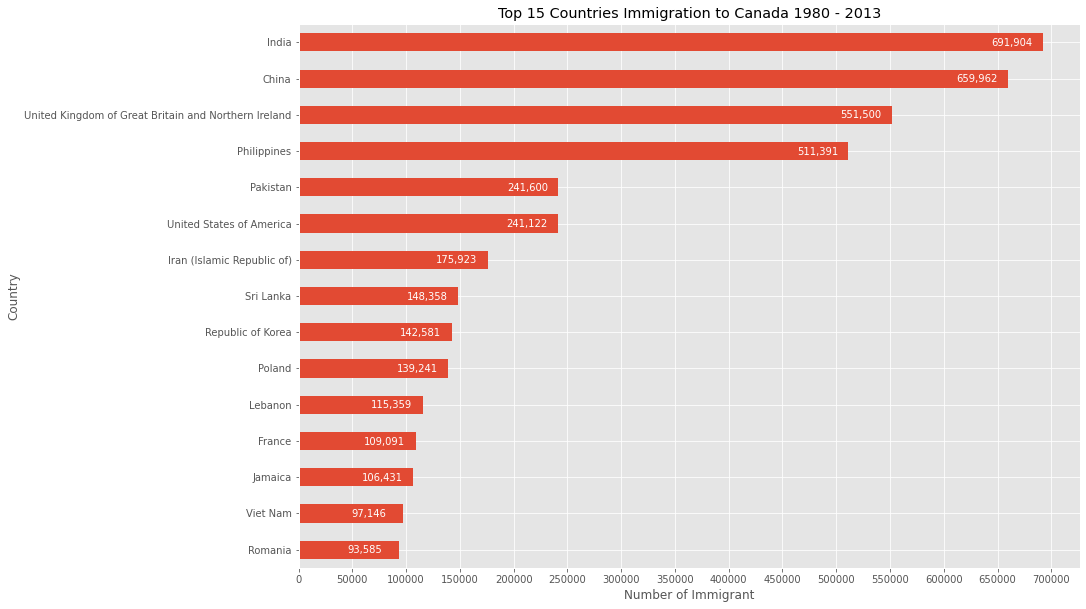

In [222]:
ax = df_top_15.plot(kind='barh', figsize=(14, 10))
ax.set_xticks(np.arange(0, 750000, 50000))

for index, value in enumerate(df_top_15):
    label = format(int(value), ',')  
    plt.annotate(label, xy=(value - 48000, index - 0.1), color='white')

plt.xlabel('Number of Immigrant')
plt.title('Top 15 Countries Immigration to Canada 1980 - 2013')
plt.show()

# Thank you for completing this lab!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).